In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Exploratory Data Analysis with the Game-by-Game Dataset and its Metrics

### Note*
### In all of the columns that end in "_DIFFERENCE", it is the metric from the home team minus the metric from the away team. These values were calculated in the "Finalizing Dataset.ipynb" notebook.
### Thus, in all of the columns that end in "_DIFFERENCE", positive values indicate that the home team had a higher value for the metric than the away team and negative values indicate that the home team had a lower value for the metric than the away team.

In [2]:
df = pd.read_csv('Dataset For ML Modeling.csv')
df.head()

,GAME_DATE_EST,GAME_ID,SEASON,TEAM_ID_HOME,TEAM_CITY_HOME,TEAM_NICKNAME_HOME,GAME_NUMBER_TEAM_HOME,TEAM_ID_AWAY,TEAM_CITY_AWAY,TEAM_NICKNAME_AWAY,...,PTS_DIFFERENCE,FG_PCT_DIFFERENCE,FT_PCT_DIFFERENCE,FG3_PCT_DIFFERENCE,AST_DIFFERENCE,REB_DIFFERENCE,STREAK_DIFFERENCE,W_PCT_DIFFERENCE,HOME_ROAD_W_PCT_DIFFERENCE,HOME_TEAM_WINS
0,2003-10-30,20300016,2003,1610612753,Orlando,Magic,2,1610612740,New Orleans,Pelicans,...,-3.0,0.044,-0.148,0.090,-7.0,-11.0,0.0,0.0,0.0,0
1,2003-10-30,20300018,2003,1610612756,Phoenix,Suns,2,1610612739,Cleveland,Cavaliers,...,-10.0,-0.104,0.143,-0.045,-10.0,4.0,0.0,0.0,0.0,1
2,2003-10-31,20300024,2003,1610612741,Chicago,Bulls,2,1610612737,Atlanta,Hawks,...,-9.0,-0.081,-0.124,0.017,-2.0,-11.0,0.0,0.0,0.0,1
3,2003-10-31,20300025,2003,1610612746,Los Angeles,Clippers,2,1610612760,Seattle,Thunder,...,-9.0,0.010,0.179,0.090,-1.0,6.0,-2.0,-1.0,0.0,0
4,2003-10-31,20300019,2003,1610612761,Toronto,Raptors,2,1610612764,Washington,Wizards,...,-9.0,-0.062,0.133,-0.250,-8.0,-3.0,0.0,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24073 entries, 0 to 24072
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GAME_DATE_EST               24073 non-null  object 
 1   GAME_ID                     24073 non-null  int64  
 2   SEASON                      24073 non-null  int64  
 3   TEAM_ID_HOME                24073 non-null  int64  
 4   TEAM_CITY_HOME              24073 non-null  object 
 5   TEAM_NICKNAME_HOME          24073 non-null  object 
 6   GAME_NUMBER_TEAM_HOME       24073 non-null  int64  
 7   TEAM_ID_AWAY                24073 non-null  int64  
 8   TEAM_CITY_AWAY              24073 non-null  object 
 9   TEAM_NICKNAME_AWAY          24073 non-null  object 
 10  GAME_NUMBER_TEAM_AWAY       24073 non-null  int64  
 11  EFF_DIFFERENCE              24073 non-null  float64
 12  PTS_DIFFERENCE              24073 non-null  float64
 13  FG_PCT_DIFFERENCE           240

In [4]:
df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'SEASON', 'TEAM_ID_HOME', 'TEAM_CITY_HOME',
       'TEAM_NICKNAME_HOME', 'GAME_NUMBER_TEAM_HOME', 'TEAM_ID_AWAY',
       'TEAM_CITY_AWAY', 'TEAM_NICKNAME_AWAY', 'GAME_NUMBER_TEAM_AWAY',
       'EFF_DIFFERENCE', 'PTS_DIFFERENCE', 'FG_PCT_DIFFERENCE',
       'FT_PCT_DIFFERENCE', 'FG3_PCT_DIFFERENCE', 'AST_DIFFERENCE',
       'REB_DIFFERENCE', 'STREAK_DIFFERENCE', 'W_PCT_DIFFERENCE',
       'HOME_ROAD_W_PCT_DIFFERENCE', 'HOME_TEAM_WINS'],
      dtype='object')

In [5]:
df.isna().sum()

GAME_DATE_EST                 0
GAME_ID                       0
SEASON                        0
TEAM_ID_HOME                  0
TEAM_CITY_HOME                0
TEAM_NICKNAME_HOME            0
GAME_NUMBER_TEAM_HOME         0
TEAM_ID_AWAY                  0
TEAM_CITY_AWAY                0
TEAM_NICKNAME_AWAY            0
GAME_NUMBER_TEAM_AWAY         0
EFF_DIFFERENCE                0
PTS_DIFFERENCE                0
FG_PCT_DIFFERENCE             0
FT_PCT_DIFFERENCE             0
FG3_PCT_DIFFERENCE            0
AST_DIFFERENCE                0
REB_DIFFERENCE                0
STREAK_DIFFERENCE             0
W_PCT_DIFFERENCE              0
HOME_ROAD_W_PCT_DIFFERENCE    0
HOME_TEAM_WINS                0
dtype: int64

## Heatmap that shows how the different columns are correlated

In [6]:
df.corr()

,GAME_ID,SEASON,TEAM_ID_HOME,GAME_NUMBER_TEAM_HOME,TEAM_ID_AWAY,GAME_NUMBER_TEAM_AWAY,EFF_DIFFERENCE,PTS_DIFFERENCE,FG_PCT_DIFFERENCE,FT_PCT_DIFFERENCE,FG3_PCT_DIFFERENCE,AST_DIFFERENCE,REB_DIFFERENCE,STREAK_DIFFERENCE,W_PCT_DIFFERENCE,HOME_ROAD_W_PCT_DIFFERENCE,HOME_TEAM_WINS
GAME_ID,1.000000,0.092650,-0.035428,0.440354,-0.034486,0.440787,-0.006990,-0.011249,-0.007884,-0.005503,0.000069,-0.005518,-0.006382,-0.022696,0.011823,0.006946,0.019645
SEASON,0.092650,1.000000,-0.000046,-0.054716,0.003023,-0.054981,0.007216,-0.000351,-0.002962,0.001333,-0.003602,0.003247,0.004702,-0.001741,0.001200,-0.108530,-0.035206
TEAM_ID_HOME,-0.035428,-0.000046,1.000000,-0.021603,-0.043187,-0.020942,-0.048374,-0.050514,-0.030520,-0.019497,-0.012757,-0.080201,-0.029129,-0.033235,-0.050586,-0.031175,-0.025160
GAME_NUMBER_TEAM_HOME,0.440354,-0.054716,-0.021603,1.000000,-0.010879,0.998289,0.010889,0.000631,-0.003149,-0.004492,0.005076,-0.002603,-0.001532,-0.011713,0.009851,0.015004,0.016011
TEAM_ID_AWAY,-0.034486,0.003023,-0.043187,-0.010879,1.000000,-0.010936,0.037591,0.045742,0.032791,0.013793,0.017025,0.085137,0.030312,0.023670,0.048192,0.054559,0.029637
GAME_NUMBER_TEAM_AWAY,0.440787,-0.054981,-0.020942,0.998289,-0.010936,1.000000,0.009715,-0.000256,-0.004603,-0.005013,0.004283,-0.002820,-0.001201,-0.011106,0.009740,0.014574,0.016269
EFF_DIFFERENCE,-0.006990,0.007216,-0.048374,0.010889,0.037591,0.009715,1.000000,0.585863,0.465561,0.131748,0.272444,0.439845,0.161655,0.296357,0.253075,0.194928,0.165439
PTS_DIFFERENCE,-0.011249,-0.000351,-0.050514,0.000631,0.045742,-0.000256,0.585863,1.000000,0.677720,0.178221,0.430328,0.536387,0.168588,0.357696,0.335178,0.260650,0.129728
FG_PCT_DIFFERENCE,-0.007884,-0.002962,-0.030520,-0.003149,0.032791,-0.004603,0.465561,0.677720,1.000000,0.033765,0.449962,0.542170,-0.135891,0.381008,0.346662,0.269025,0.139327
FT_PCT_DIFFERENCE,-0.005503,0.001333,-0.019497,-0.004492,0.013793,-0.005013,0.131748,0.178221,0.033765,1.000000,0.051633,0.024696,-0.073875,0.080595,0.089112,0.069540,0.034428


In [7]:
df.corr()[(df.corr() < -0.5) | (df.corr() > 0.5)]

,GAME_ID,SEASON,TEAM_ID_HOME,GAME_NUMBER_TEAM_HOME,TEAM_ID_AWAY,GAME_NUMBER_TEAM_AWAY,EFF_DIFFERENCE,PTS_DIFFERENCE,FG_PCT_DIFFERENCE,FT_PCT_DIFFERENCE,FG3_PCT_DIFFERENCE,AST_DIFFERENCE,REB_DIFFERENCE,STREAK_DIFFERENCE,W_PCT_DIFFERENCE,HOME_ROAD_W_PCT_DIFFERENCE,HOME_TEAM_WINS
GAME_ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEASON,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEAM_ID_HOME,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GAME_NUMBER_TEAM_HOME,NaN,NaN,NaN,1.000000,NaN,0.998289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEAM_ID_AWAY,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GAME_NUMBER_TEAM_AWAY,NaN,NaN,NaN,0.998289,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EFF_DIFFERENCE,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.585863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PTS_DIFFERENCE,NaN,NaN,NaN,NaN,NaN,NaN,0.585863,1.000000,0.67772,NaN,NaN,0.536387,NaN,NaN,NaN,NaN,NaN
FG_PCT_DIFFERENCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.677720,1.00000,NaN,NaN,0.542170,NaN,NaN,NaN,NaN,NaN
FT_PCT_DIFFERENCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


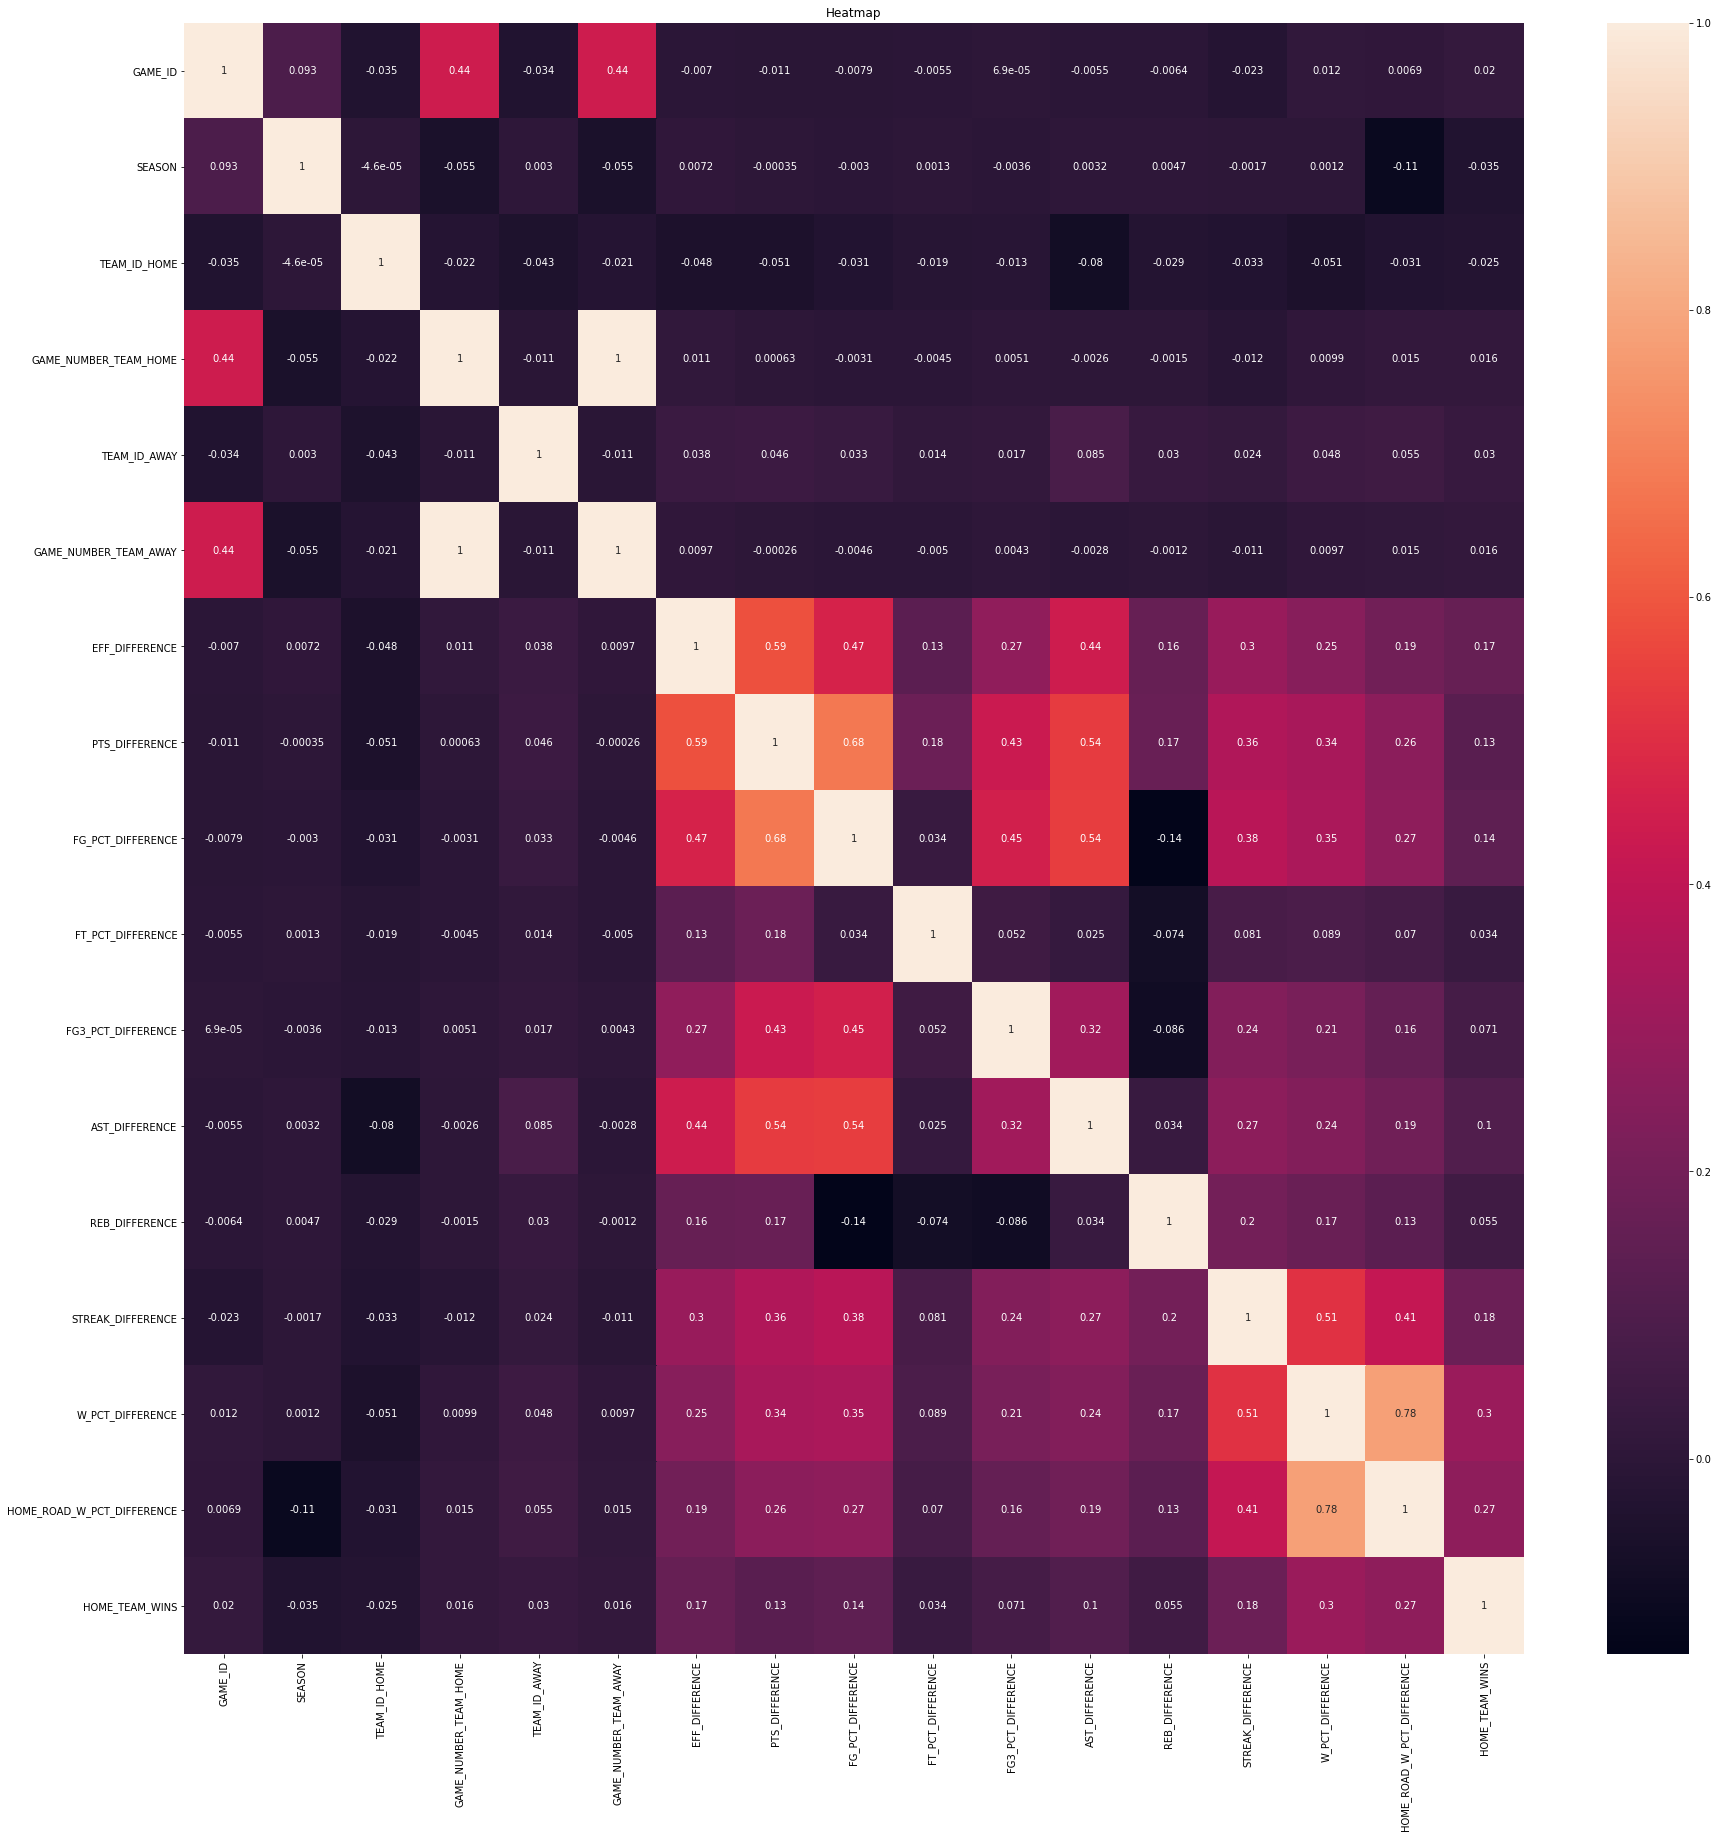

In [8]:
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap')
plt.rcParams.update({'font.size': 15})
fig = plt.gcf()
fig.set_size_inches(30, 30)
plt.show()

### The Distribution of the HOME_TEAM_WINS column (1 indicating that the home team won and 0 indicating that the home team loss)

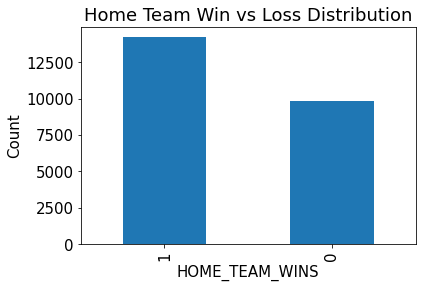

In [9]:
df['HOME_TEAM_WINS'].value_counts().plot(kind='bar')
plt.title('Home Team Win vs Loss Distribution')
plt.xlabel('HOME_TEAM_WINS')
plt.ylabel('Count')
plt.show()

### Plotting the mean values in each of the "_DIFFERENCE" columns for each of the HOME_TEAM_WINS column values

### In every "_DIFFERENCE" metric, the average of the metric is greater when the value of the HOME_TEAM_WINS column is 1
### Additionally, in every "_DIFFERENCE" metric except for the "HOME_ROAD_W_PCT_DIFFERENCE" metric (which is the difference between the home team's home W PCT and the road team's road W PCT), the mean value is positive when the HOME_TEAM_WINS column is 1 and the mean value is negative when the HOME_TEAM_WINS column is 0

   HOME_TEAM_WINS  EFF_DIFFERENCE
0               0       -0.412518
1               1        0.362610



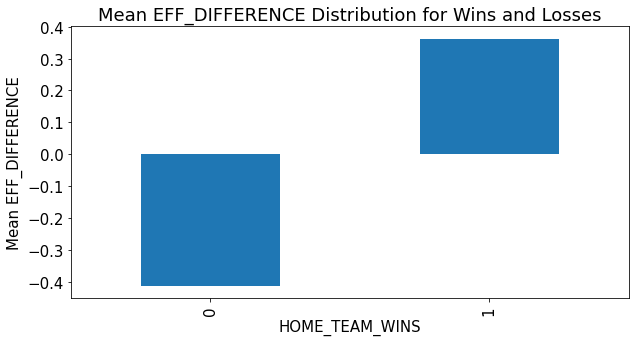

In [10]:
eff_difference_df = df.groupby('HOME_TEAM_WINS')['EFF_DIFFERENCE'].mean().reset_index()
print(eff_difference_df)
print()
df.groupby('HOME_TEAM_WINS')['EFF_DIFFERENCE'].mean().plot(kind='bar')
plt.ylabel('Mean EFF_DIFFERENCE')
plt.title('Mean EFF_DIFFERENCE Distribution for Wins and Losses')
fig = plt.gcf()
fig.set_size_inches(10, 5, forward=True)
plt.show()

   HOME_TEAM_WINS  PTS_DIFFERENCE
0               0       -1.703535
1               1        0.899446



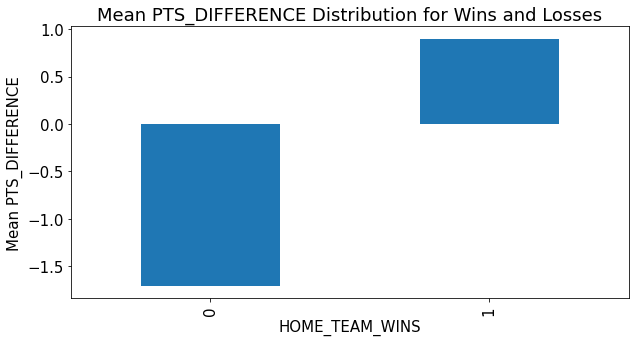

In [11]:
pts_difference_df = df.groupby('HOME_TEAM_WINS')['PTS_DIFFERENCE'].mean().reset_index()
print(pts_difference_df)
print()
df.groupby('HOME_TEAM_WINS')['PTS_DIFFERENCE'].mean().plot(kind='bar')
plt.ylabel('Mean PTS_DIFFERENCE')
plt.title('Mean PTS_DIFFERENCE Distribution for Wins and Losses')
fig = plt.gcf()
fig.set_size_inches(10, 5, forward=True)
plt.show()

   HOME_TEAM_WINS  FG_PCT_DIFFERENCE
0               0          -0.007481
1               1           0.004469



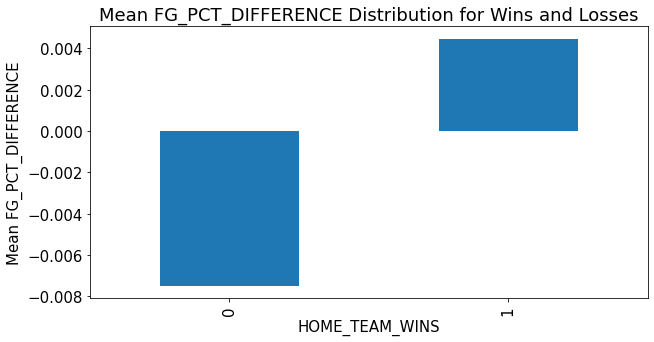

In [12]:
fg_pct_difference_df = df.groupby('HOME_TEAM_WINS')['FG_PCT_DIFFERENCE'].mean().reset_index()
print(fg_pct_difference_df)
print()
df.groupby('HOME_TEAM_WINS')['FG_PCT_DIFFERENCE'].mean().plot(kind='bar')
plt.ylabel('Mean FG_PCT_DIFFERENCE')
plt.title('Mean FG_PCT_DIFFERENCE Distribution for Wins and Losses')
fig = plt.gcf()
fig.set_size_inches(10, 5, forward=True)
plt.show()

   HOME_TEAM_WINS  FT_PCT_DIFFERENCE
0               0          -0.003334
1               1           0.002209



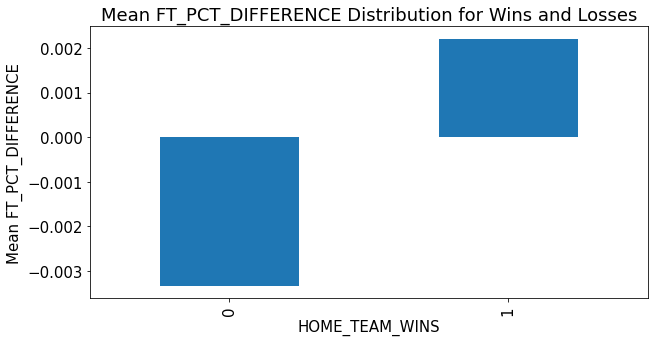

In [13]:
ft_pct_difference_df = df.groupby('HOME_TEAM_WINS')['FT_PCT_DIFFERENCE'].mean().reset_index()
print(ft_pct_difference_df)
print()
df.groupby('HOME_TEAM_WINS')['FT_PCT_DIFFERENCE'].mean().plot(kind='bar')
plt.ylabel('Mean FT_PCT_DIFFERENCE')
plt.title('Mean FT_PCT_DIFFERENCE Distribution for Wins and Losses')
fig = plt.gcf()
fig.set_size_inches(10, 5, forward=True)
plt.show()

   HOME_TEAM_WINS  FG3_PCT_DIFFERENCE
0               0           -0.007435
1               1            0.003952



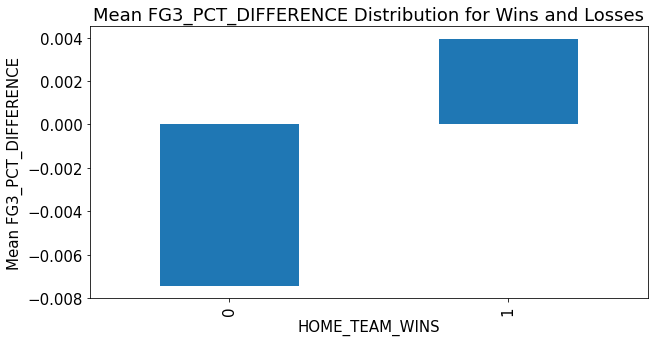

In [14]:
fg3_pct_difference_df = df.groupby('HOME_TEAM_WINS')['FG3_PCT_DIFFERENCE'].mean().reset_index()
print(fg3_pct_difference_df)
print()
df.groupby('HOME_TEAM_WINS')['FG3_PCT_DIFFERENCE'].mean().plot(kind='bar')
plt.ylabel('Mean FG3_PCT_DIFFERENCE')
plt.title('Mean FG3_PCT_DIFFERENCE Distribution for Wins and Losses')
fig = plt.gcf()
fig.set_size_inches(10, 5, forward=True)
plt.show()

   HOME_TEAM_WINS  AST_DIFFERENCE
0               0       -0.567472
1               1        0.312770



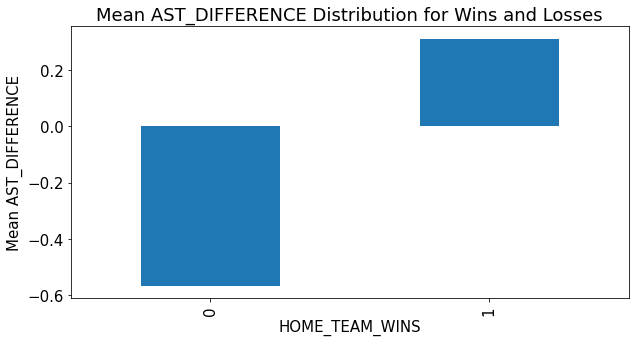

In [15]:
ast_difference_df = df.groupby('HOME_TEAM_WINS')['AST_DIFFERENCE'].mean().reset_index()
print(ast_difference_df)
print()
df.groupby('HOME_TEAM_WINS')['AST_DIFFERENCE'].mean().plot(kind='bar')
plt.ylabel('Mean AST_DIFFERENCE')
plt.title('Mean AST_DIFFERENCE Distribution for Wins and Losses')
fig = plt.gcf()
fig.set_size_inches(10, 5, forward=True)
plt.show()

   HOME_TEAM_WINS  REB_DIFFERENCE
0               0       -0.422779
1               1        0.135254



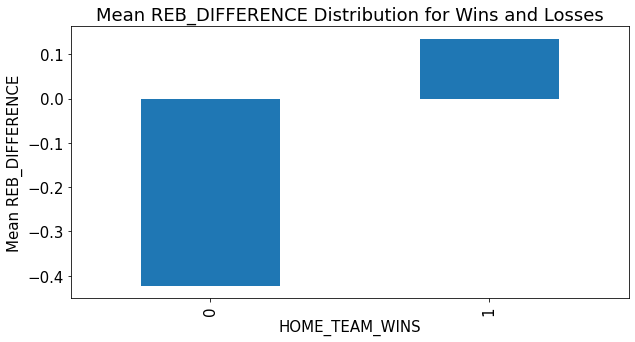

In [16]:
reb_difference_df = df.groupby('HOME_TEAM_WINS')['REB_DIFFERENCE'].mean().reset_index()
print(reb_difference_df)
print()
df.groupby('HOME_TEAM_WINS')['REB_DIFFERENCE'].mean().plot(kind='bar')
plt.ylabel('Mean REB_DIFFERENCE')
plt.title('Mean REB_DIFFERENCE Distribution for Wins and Losses')
fig = plt.gcf()
fig.set_size_inches(10, 5, forward=True)
plt.show()

   HOME_TEAM_WINS  STREAK_DIFFERENCE
0               0          -1.070885
1               1           0.620273



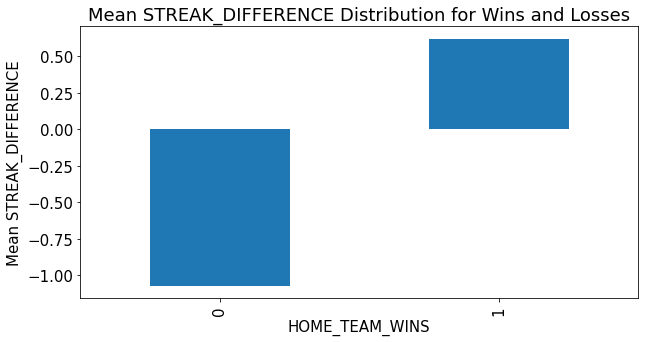

In [17]:
streak_difference_df = df.groupby('HOME_TEAM_WINS')['STREAK_DIFFERENCE'].mean().reset_index()
print(streak_difference_df)
print()
df.groupby('HOME_TEAM_WINS')['STREAK_DIFFERENCE'].mean().plot(kind='bar')
plt.ylabel('Mean STREAK_DIFFERENCE')
plt.title('Mean STREAK_DIFFERENCE Distribution for Wins and Losses')
fig = plt.gcf()
fig.set_size_inches(10, 5, forward=True)
plt.show()

   HOME_TEAM_WINS  W_PCT_DIFFERENCE
0               0         -0.095965
1               1          0.061519



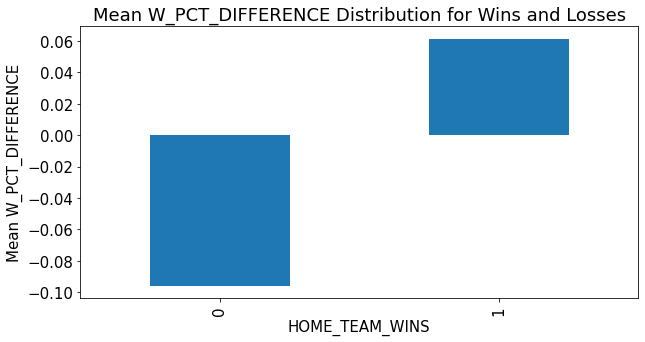

In [18]:
w_pct_difference_df = df.groupby('HOME_TEAM_WINS')['W_PCT_DIFFERENCE'].mean().reset_index()
print(w_pct_difference_df)
print()
df.groupby('HOME_TEAM_WINS')['W_PCT_DIFFERENCE'].mean().plot(kind='bar')
plt.ylabel('Mean W_PCT_DIFFERENCE')
plt.title('Mean W_PCT_DIFFERENCE Distribution for Wins and Losses')
fig = plt.gcf()
fig.set_size_inches(10, 5, forward=True)
plt.show()

   HOME_TEAM_WINS  HOME_ROAD_W_PCT_DIFFERENCE
0               0                    0.078798
1               1                    0.240535



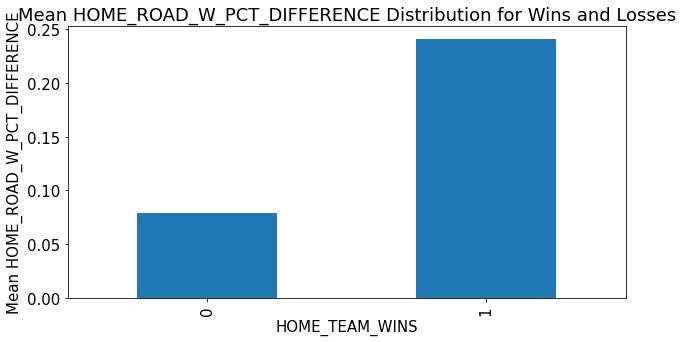

In [19]:
home_road_w_pct_difference_df = df.groupby('HOME_TEAM_WINS')['HOME_ROAD_W_PCT_DIFFERENCE'].mean().reset_index()
print(home_road_w_pct_difference_df)
print()
df.groupby('HOME_TEAM_WINS')['HOME_ROAD_W_PCT_DIFFERENCE'].mean().plot(kind='bar')
plt.ylabel('Mean HOME_ROAD_W_PCT_DIFFERENCE')
plt.title('Mean HOME_ROAD_W_PCT_DIFFERENCE Distribution for Wins and Losses')
fig = plt.gcf()
fig.set_size_inches(10, 5, forward=True)
plt.show()

## Creating Machine Learning Classification Models

In [20]:
feature_columns = ['EFF_DIFFERENCE', 'PTS_DIFFERENCE', 'FG_PCT_DIFFERENCE', 'FT_PCT_DIFFERENCE', 'FG3_PCT_DIFFERENCE', 
                   'AST_DIFFERENCE', 'REB_DIFFERENCE', 'STREAK_DIFFERENCE', 'W_PCT_DIFFERENCE', 'HOME_ROAD_W_PCT_DIFFERENCE']
target_column = 'HOME_TEAM_WINS'
X = df[feature_columns]
y = df[target_column]

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
print('Length of X_train:', len(X_train))
print('Length of X_test:', len(X_test))
print('Length of y_train:', len(y_train))
print('Length of y_test:', len(y_test))

Length of X_train: 18054
Length of X_test: 6019
Length of y_train: 18054
Length of y_test: 6019


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [23]:
model_accuracy_dict = {}
model_accuracy_dict['Classification Model'] = []
model_accuracy_dict['Test Accuracy Score'] = []
model_accuracy_dict['Best Mean Test Accuracy Score'] = []

### Creating Decision Tree Classifier Model
#### Since it's a tree-based model, data scaling is not necessary

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [25]:
dtc = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0)
dtc_param_grid = {'max_depth': [2,4,6,8,10,12]}
dtc_grid_search_cv = GridSearchCV(dtc, param_grid=dtc_param_grid, scoring='accuracy', cv=5, return_train_score=True)
dtc_grid_search_cv.fit(X_train,y_train)
dtc_grid_search_y_predictions = dtc_grid_search_cv.predict(X_test)
print('Decision Tree Grid Search CV Train Score:', dtc_grid_search_cv.score(X_train, y_train))
print('Decision Tree Grid Search CV Test Score:', dtc_grid_search_cv.score(X_test, y_test))

Decision Tree Grid Search CV Train Score: 0.6630663564860972
Decision Tree Grid Search CV Test Score: 0.655922910782522


In [26]:
dtc_grid_search_cv_best_params = dtc_grid_search_cv.best_params_
print('Decision Tree Classifier Best Parameters:', dtc_grid_search_cv_best_params)
print('Decision Tree Classifier Best Mean Test Score:', dtc_grid_search_cv.best_score_)

Decision Tree Classifier Best Parameters: {'max_depth': 4}
Decision Tree Classifier Best Mean Test Score: 0.6589677585647425


In [27]:
pd.DataFrame(dtc_grid_search_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022863,0.001388,0.002008,0.000666,2,{'max_depth': 2},0.659374,0.642758,0.649958,0.646635,...,0.648665,0.005864,4,0.656512,0.665513,0.644326,0.645157,0.645666,0.651435,0.008333
1,0.043272,0.000856,0.002187,0.000403,4,{'max_depth': 4},0.659374,0.643589,0.668236,0.660759,...,0.658968,0.008259,1,0.663089,0.666897,0.661289,0.665443,0.662697,0.663883,0.002014
2,0.066816,0.000630,0.002202,0.000395,6,{'max_depth': 6},0.650789,0.647743,0.674052,0.661313,...,0.657970,0.009274,2,0.670567,0.675760,0.673129,0.675206,0.677444,0.674421,0.002369
3,0.090569,0.005277,0.002186,0.000385,8,{'max_depth': 8},0.644974,0.644974,0.659651,0.650512,...,0.650770,0.005567,3,0.688777,0.688777,0.686769,0.689607,0.692260,0.689238,0.001777
4,0.132046,0.015700,0.002793,0.001596,10,{'max_depth': 10},0.640820,0.638881,0.649682,0.627804,...,0.640357,0.007279,5,0.708786,0.711071,0.714118,0.715710,0.714068,0.712751,0.002486
5,0.154599,0.015228,0.002993,0.001092,12,{'max_depth': 12},0.633343,0.631958,0.650235,0.628912,...,0.635759,0.007466,6,0.739943,0.740774,0.742505,0.745205,0.743769,0.742439,0.001920


In [28]:
print('Decision Tree Classification Report:', classification_report(y_true=y_test, y_pred=dtc_grid_search_y_predictions))
print()
print('Decision Tree Confusion Matrix:', confusion_matrix(y_true=y_test, y_pred=dtc_grid_search_y_predictions))
print()
print('Decision Tree Accuracy Score:', accuracy_score(y_true=y_test, y_pred=dtc_grid_search_y_predictions))

Decision Tree Classification Report:               precision    recall  f1-score   support

           0       0.61      0.45      0.52      2481
           1       0.67      0.80      0.73      3538

    accuracy                           0.66      6019
   macro avg       0.64      0.62      0.62      6019
weighted avg       0.65      0.66      0.64      6019


Decision Tree Confusion Matrix: [[1105 1376]
 [ 695 2843]]

Decision Tree Accuracy Score: 0.655922910782522


In [29]:
dtc = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0, max_depth=4)
dtc.fit(X_train, y_train)
dtc_y_predictions = dtc.predict(X_test)
print('Decision Tree Classification Report:')
print(classification_report(y_true=y_test, y_pred=dtc_y_predictions))
print()
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_true=y_test, y_pred=dtc_y_predictions))
print()
print('Decision Tree Accuracy Score:')
print(accuracy_score(y_true=y_test, y_pred=dtc_y_predictions))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.45      0.52      2481
           1       0.67      0.80      0.73      3538

    accuracy                           0.66      6019
   macro avg       0.64      0.62      0.62      6019
weighted avg       0.65      0.66      0.64      6019


Decision Tree Confusion Matrix:
[[1105 1376]
 [ 695 2843]]

Decision Tree Accuracy Score:
0.655922910782522


In [30]:
feature_columns_dict = {}
for i in range(len(feature_columns)):
    feature_columns_dict[i] = feature_columns[i]
print(feature_columns_dict)

{0: 'EFF_DIFFERENCE', 1: 'PTS_DIFFERENCE', 2: 'FG_PCT_DIFFERENCE', 3: 'FT_PCT_DIFFERENCE', 4: 'FG3_PCT_DIFFERENCE', 5: 'AST_DIFFERENCE', 6: 'REB_DIFFERENCE', 7: 'STREAK_DIFFERENCE', 8: 'W_PCT_DIFFERENCE', 9: 'HOME_ROAD_W_PCT_DIFFERENCE'}


In [31]:
dtc_text_representation = tree.export_text(dtc)
print(dtc_text_representation)

|--- feature_8 <= -0.02
|   |--- feature_8 <= -0.27
|   |   |--- feature_0 <= 1.02
|   |   |   |--- feature_9 <= -0.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_9 >  -0.00
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  1.02
|   |   |   |--- feature_0 <= 1.06
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  1.06
|   |   |   |   |--- class: 0
|   |--- feature_8 >  -0.27
|   |   |--- feature_0 <= 0.43
|   |   |   |--- feature_8 <= -0.07
|   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  -0.07
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  0.43
|   |   |   |--- feature_8 <= -0.11
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  -0.11
|   |   |   |   |--- class: 1
|--- feature_8 >  -0.02
|   |--- feature_8 <= 0.19
|   |   |--- feature_0 <= -0.66
|   |   |   |--- feature_8 <= 0.08
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.08
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  -0.66
|   |   |   |--- feature_

In [32]:
dtc_feature_importances_df = pd.DataFrame(dtc.feature_importances_, index = X_train.columns, columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
dtc_feature_importances_df.columns = ['Feature', 'Importance']
dtc_feature_importances_df

,Feature,Importance
0,W_PCT_DIFFERENCE,0.870067
1,EFF_DIFFERENCE,0.100589
2,HOME_ROAD_W_PCT_DIFFERENCE,0.029344
3,PTS_DIFFERENCE,0.000000
4,FG_PCT_DIFFERENCE,0.000000
5,FT_PCT_DIFFERENCE,0.000000
6,FG3_PCT_DIFFERENCE,0.000000
7,AST_DIFFERENCE,0.000000
8,REB_DIFFERENCE,0.000000
9,STREAK_DIFFERENCE,0.000000


In [33]:
model_accuracy_dict['Classification Model'].append('Decision Tree Classifier')
model_accuracy_dict['Test Accuracy Score'].append(accuracy_score(y_true=y_test, y_pred=dtc_y_predictions))
model_accuracy_dict['Best Mean Test Accuracy Score'].append(dtc_grid_search_cv.best_score_)

### Creating Random Forest Classifier Model
#### Since it's a tree-based model, data scaling is not necessary

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(criterion='entropy', random_state=0)
rfc_param_grid = {'n_estimators':[10,50,100,150,200], 'max_depth': [1,2,3,4,5]}#, 'min_samples_split': [0.5,1.0,2,4],
                 #'min_samples_leaf': [1,2,3,4,5], #'max_features': ['sqrt', 'log2', None],
                 #'min_impurity_decrease': [0,0.5,1.0,2.0]}
rfc_grid_search_cv = GridSearchCV(rfc, param_grid=rfc_param_grid, scoring='accuracy', cv=5, return_train_score=True)
rfc_grid_search_cv.fit(X_train,y_train)
rfc_grid_search_cv_y_predictions = rfc_grid_search_cv.predict(X_test)
print('Random Forest Grid Search CV Train Score:', rfc_grid_search_cv.score(X_train, y_train))
print('Random Forest Grid Search CV Test Score:', rfc_grid_search_cv.score(X_test, y_test))

Random Forest Grid Search CV Train Score: 0.664783427495292
Random Forest Grid Search CV Test Score: 0.6564213324472504


In [36]:
rfc_grid_search_cv_best_params = rfc_grid_search_cv.best_params_
print('Random Forest Classifier Best Parameters:', rfc_grid_search_cv_best_params)
print('Random Forest Classifier Best Mean Test Score:', rfc_grid_search_cv.best_score_)

Random Forest Classifier Best Parameters: {'max_depth': 4, 'n_estimators': 100}
Random Forest Classifier Best Mean Test Score: 0.6594657751668302


In [37]:
pd.DataFrame(rfc_grid_search_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.039914,0.002000,0.004388,0.000502,1,10,"{'max_depth': 1, 'n_estimators': 10}",0.639712,0.632789,0.638050,...,0.629001,0.009883,25,0.632209,0.634979,0.631725,0.632279,0.626142,0.631467,0.002897
1,0.193013,0.004362,0.013164,0.000985,1,50,"{'max_depth': 1, 'n_estimators': 50}",0.638881,0.635004,0.637497,...,0.630774,0.008269,24,0.633733,0.641972,0.628332,0.636225,0.633481,0.634749,0.004431
2,0.413466,0.030240,0.026941,0.002908,1,100,"{'max_depth': 1, 'n_estimators': 100}",0.649682,0.639712,0.647189,...,0.643237,0.005485,21,0.642595,0.656027,0.639964,0.647649,0.644558,0.646159,0.005536
3,0.967303,0.122154,0.091262,0.038614,1,150,"{'max_depth': 1, 'n_estimators': 150}",0.644697,0.639712,0.648297,...,0.640302,0.008108,22,0.639687,0.653812,0.634910,0.643980,0.641720,0.642822,0.006257
4,0.941458,0.261072,0.041761,0.000670,1,200,"{'max_depth': 1, 'n_estimators': 200}",0.641651,0.639158,0.644420,...,0.637975,0.008173,23,0.638787,0.652427,0.633871,0.641764,0.641789,0.641728,0.006080
5,0.065433,0.010237,0.004195,0.000413,2,10,"{'max_depth': 2, 'n_estimators': 10}",0.662974,0.637497,0.665467,...,0.653595,0.010036,20,0.657135,0.658866,0.656235,0.656512,0.655774,0.656904,0.001075
6,0.302496,0.010008,0.014354,0.001021,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.663805,0.644420,0.659374,...,0.653650,0.007606,19,0.655335,0.661635,0.652358,0.658520,0.657505,0.657070,0.003110
7,0.816646,0.161728,0.034186,0.007634,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.661867,0.642204,0.670174,...,0.655589,0.009844,15,0.658935,0.663713,0.653673,0.661081,0.660274,0.659535,0.003320
8,1.268084,0.283638,0.049269,0.007793,2,150,"{'max_depth': 2, 'n_estimators': 150}",0.662143,0.640266,0.665190,...,0.653927,0.009244,17,0.656166,0.662812,0.652565,0.660943,0.659166,0.658331,0.003620
9,1.437515,0.246847,0.058636,0.015003,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.661313,0.643035,0.663805,...,0.653872,0.008170,18,0.655819,0.663643,0.652634,0.659420,0.658613,0.658026,0.003682


In [38]:
print('Random Forest Classification Report:', classification_report(y_true=y_test, y_pred=rfc_grid_search_cv_y_predictions))
print()
print('Random Forest Confusion Matrix:', confusion_matrix(y_true=y_test, y_pred=rfc_grid_search_cv_y_predictions))
print()
print('Random Forest Accuracy Score:', accuracy_score(y_true=y_test, y_pred=rfc_grid_search_cv_y_predictions))

Random Forest Classification Report:               precision    recall  f1-score   support

           0       0.61      0.46      0.52      2481
           1       0.68      0.79      0.73      3538

    accuracy                           0.66      6019
   macro avg       0.64      0.63      0.63      6019
weighted avg       0.65      0.66      0.65      6019


Random Forest Confusion Matrix: [[1141 1340]
 [ 728 2810]]

Random Forest Accuracy Score: 0.6564213324472504


In [39]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
rfc_y_predictions = rfc.predict(X_test)
print('Random Forest Classification Report:')
print(classification_report(y_true=y_test, y_pred=rfc_y_predictions))
print()
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_true=y_test, y_pred=rfc_y_predictions))
print()
print('Random Forest Accuracy Score:')
print(accuracy_score(y_true=y_test, y_pred=rfc_y_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.46      0.52      2481
           1       0.68      0.79      0.73      3538

    accuracy                           0.66      6019
   macro avg       0.64      0.63      0.63      6019
weighted avg       0.65      0.66      0.65      6019


Random Forest Confusion Matrix:
[[1141 1340]
 [ 728 2810]]

Random Forest Accuracy Score:
0.6564213324472504


In [40]:
rfc_feature_importances_df = pd.DataFrame(rfc.feature_importances_, index = X_train.columns, columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
rfc_feature_importances_df.columns = ['Feature', 'Importance']
rfc_feature_importances_df

,Feature,Importance
0,W_PCT_DIFFERENCE,0.437092
1,HOME_ROAD_W_PCT_DIFFERENCE,0.352991
2,EFF_DIFFERENCE,0.089832
3,STREAK_DIFFERENCE,0.044917
4,PTS_DIFFERENCE,0.028015
5,FG_PCT_DIFFERENCE,0.023284
6,FT_PCT_DIFFERENCE,0.007323
7,FG3_PCT_DIFFERENCE,0.005913
8,AST_DIFFERENCE,0.005717
9,REB_DIFFERENCE,0.004917


In [41]:
model_accuracy_dict['Classification Model'].append('Random Forest Classifier')
model_accuracy_dict['Test Accuracy Score'].append(accuracy_score(y_true=y_test, y_pred=rfc_y_predictions))
model_accuracy_dict['Best Mean Test Accuracy Score'].append(rfc_grid_search_cv.best_score_)

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [43]:
lr = LogisticRegression(random_state=0)
lr_param_grid = {'C': [1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
lr_grid_search_cv = GridSearchCV(lr, param_grid=lr_param_grid, scoring='accuracy', cv=5, return_train_score=True)
lr_grid_search_cv.fit(X_train, y_train)
lr_grid_search_cv_y_predictions = lr_grid_search_cv.predict(X_test)
print('Logistic Regression Grid Search CV Train Score:', lr_grid_search_cv.score(X_train, y_train))
print('Logistic Regression Grid Search CV Test Score:', lr_grid_search_cv.score(X_test, y_test))

C:\Users\peech\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\peech\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\peech\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\peech\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\peech\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

Logistic Regression Grid Search CV Train Score: 0.6596876038551014
Logistic Regression Grid Search CV Test Score: 0.6537630835686992


C:\Users\peech\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [44]:
lr_grid_search_cv_best_params = lr_grid_search_cv.best_params_
print('Logistic Regression Best Parameters:', lr_grid_search_cv_best_params)
print('Logistic Regression Best Mean Test Score:', lr_grid_search_cv.best_score_)

Logistic Regression Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Best Mean Test Score: 0.6585242997888109


In [45]:
pd.DataFrame(lr_grid_search_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030935,0.005026,0.002471,0.000594,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.667405,0.649682,...,0.657860,0.005722,12,0.656027,0.662259,0.658450,0.659835,0.660274,0.659369,0.002069
1,0.547548,0.222385,0.007180,0.009386,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.667682,0.650235,...,0.658192,0.005787,8,0.656512,0.662812,0.658312,0.659697,0.660551,0.659577,0.002118
2,0.052355,0.004587,0.001795,0.000977,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.668513,0.648574,...,0.658081,0.006411,9,0.656720,0.662882,0.658866,0.660181,0.660066,0.659743,0.002003
3,0.351737,0.084422,0.002096,0.000481,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.668513,0.651343,...,0.658358,0.005719,7,0.656581,0.662466,0.658658,0.660389,0.660690,0.659757,0.001995
4,0.037493,0.007069,0.003198,0.000743,10,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.669067,0.649405,...,0.658524,0.006373,1,0.656373,0.662674,0.658589,0.660112,0.660482,0.659646,0.002093
5,0.372744,0.006217,0.002408,0.000504,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.668513,0.650235,...,0.658469,0.005984,5,0.656720,0.662674,0.658381,0.660389,0.660690,0.659771,0.002044
6,0.077387,0.017892,0.002599,0.001020,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.668790,0.649405,...,0.658358,0.006328,6,0.656373,0.662535,0.658589,0.659974,0.660551,0.659605,0.002054
7,0.306086,0.006103,0.002187,0.000385,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.668513,0.650235,...,0.658524,0.005962,1,0.656720,0.662674,0.658450,0.660389,0.660690,0.659785,0.002035
8,0.026529,0.001353,0.002001,0.000641,100,l1,liblinear,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.668236,0.648851,...,0.658081,0.006261,9,0.656512,0.662812,0.658520,0.660112,0.660274,0.659646,0.002085
9,0.367454,0.007070,0.002236,0.000390,100,l1,saga,"{'C': 100, 'penalty': 'l1', 'solver': 'saga'}",0.668513,0.650235,...,0.658524,0.006002,3,0.656720,0.662674,0.658450,0.660320,0.660690,0.659771,0.002031


In [46]:
print('Logistic Regression Classification Report:', classification_report(y_true=y_test, y_pred=lr_grid_search_cv_y_predictions))
print()
print('Logistic Regression Confusion Matrix:', confusion_matrix(y_true=y_test, y_pred=lr_grid_search_cv_y_predictions))
print()
print('Logistic Regression Accuracy Score:', accuracy_score(y_true=y_test, y_pred=lr_grid_search_cv_y_predictions))

Logistic Regression Classification Report:               precision    recall  f1-score   support

           0       0.62      0.42      0.50      2481
           1       0.67      0.82      0.74      3538

    accuracy                           0.65      6019
   macro avg       0.64      0.62      0.62      6019
weighted avg       0.65      0.65      0.64      6019


Logistic Regression Confusion Matrix: [[1035 1446]
 [ 638 2900]]

Logistic Regression Accuracy Score: 0.6537630835686992


In [47]:
lr = LogisticRegression(C=10, penalty='l1', solver='liblinear', random_state=0)
lr.fit(X_train, y_train)
lr_y_predictions = lr.predict(X_test)
print('Logistic Regression Classification Report:')
print(classification_report(y_true=y_test, y_pred=lr_y_predictions))
print()
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_true=y_test, y_pred=lr_y_predictions))
print()
print('Logistic Regression Accuracy Score:')
print(accuracy_score(y_true=y_test, y_pred=lr_y_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.42      0.50      2481
           1       0.67      0.82      0.74      3538

    accuracy                           0.65      6019
   macro avg       0.64      0.62      0.62      6019
weighted avg       0.65      0.65      0.64      6019


Logistic Regression Confusion Matrix:
[[1035 1446]
 [ 638 2900]]

Logistic Regression Accuracy Score:
0.6537630835686992


In [48]:
smf = SelectFromModel(lr, threshold = -np.inf)
smf.fit(X_train, y_train)
feature_idx = smf.get_support()
feature_name = X_train.columns[feature_idx]
for i in feature_name:
    print(i)

EFF_DIFFERENCE
PTS_DIFFERENCE
FG_PCT_DIFFERENCE
FT_PCT_DIFFERENCE
FG3_PCT_DIFFERENCE
AST_DIFFERENCE
REB_DIFFERENCE
STREAK_DIFFERENCE
W_PCT_DIFFERENCE
HOME_ROAD_W_PCT_DIFFERENCE


In [49]:
model_accuracy_dict['Classification Model'].append('Logistic Regression')
model_accuracy_dict['Test Accuracy Score'].append(accuracy_score(y_true=y_test, y_pred=lr_y_predictions))
model_accuracy_dict['Best Mean Test Accuracy Score'].append(lr_grid_search_cv.best_score_)

## Support Vector Machine Linear Kernel Classification

In [50]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_min_max_scaled = min_max_scaler.fit_transform(X_train)
X_test_min_max_scaled = min_max_scaler.transform(X_test)

In [51]:
linear_kernel_svc = SVC(kernel='linear', random_state=0)
linear_kernel_svc_param_grid = {'C': [0.5,1,2,5,10]}
linear_kernel_svc_grid_search_cv = GridSearchCV(linear_kernel_svc, param_grid=linear_kernel_svc_param_grid, cv=5, return_train_score=True)
linear_kernel_svc_grid_search_cv.fit(X_train_min_max_scaled, y_train)
linear_kernel_svc_grid_search_cv_y_predictions = linear_kernel_svc_grid_search_cv.predict(X_test_min_max_scaled)
print('Linear Kernel SVC Grid Search CV Train Score:', linear_kernel_svc_grid_search_cv.score(X_train_min_max_scaled, y_train))
print('Linear Kernel SVC Grid Search CV Test Score:', linear_kernel_svc_grid_search_cv.score(X_test_min_max_scaled, y_test))

Linear Kernel SVC Grid Search CV Train Score: 0.659189099368561
Linear Kernel SVC Grid Search CV Test Score: 0.6554244891177936


In [52]:
linear_kernel_svc_grid_search_cv_best_params = linear_kernel_svc_grid_search_cv.best_params_
print('Linear Kernel SVC Best Parameters:', linear_kernel_svc_grid_search_cv_best_params)
print('Linear Kernel SVC Best Mean Test Score:', linear_kernel_svc_grid_search_cv.best_score_)

Linear Kernel SVC Best Parameters: {'C': 5}
Linear Kernel SVC Best Mean Test Score: 0.6585798702180395


In [53]:
pd.DataFrame(linear_kernel_svc_grid_search_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.512961,1.089092,1.127754,0.199976,0.5,{'C': 0.5},0.667682,0.644974,0.660205,0.656882,...,0.657860,0.007374,4,0.656373,0.662882,0.657273,0.659351,0.659236,0.659023,0.002242
1,9.503526,1.691321,1.330577,0.270913,1,{'C': 1},0.668790,0.644697,0.660205,0.656051,...,0.657804,0.007791,5,0.656512,0.662951,0.658797,0.659212,0.659097,0.659314,0.002069
2,7.391214,0.972309,1.063380,0.077401,2,{'C': 2},0.669898,0.646081,0.660759,0.656328,...,0.658358,0.007667,3,0.656027,0.663643,0.658727,0.660112,0.659582,0.659618,0.002455
3,6.305118,0.060646,0.961192,0.005891,5,{'C': 5},0.669621,0.646635,0.660759,0.656328,...,0.658580,0.007421,1,0.656235,0.663851,0.658727,0.659489,0.659928,0.659646,0.002460
4,6.623138,0.206887,1.009535,0.050219,10,{'C': 10},0.669344,0.646912,0.660482,0.656605,...,0.658524,0.007211,2,0.656373,0.663366,0.658935,0.659835,0.659790,0.659660,0.002241


In [54]:
print('Linear Kernel SVC Classification Report:', classification_report(y_true=y_test, y_pred=linear_kernel_svc_grid_search_cv_y_predictions))
print()
print('Linear Kernel SVC Confusion Matrix:', confusion_matrix(y_true=y_test, y_pred=linear_kernel_svc_grid_search_cv_y_predictions))
print()
print('Linear Kernel SVC Accuracy Score:', accuracy_score(y_true=y_test, y_pred=linear_kernel_svc_grid_search_cv_y_predictions))

Linear Kernel SVC Classification Report:               precision    recall  f1-score   support

           0       0.63      0.41      0.49      2481
           1       0.67      0.83      0.74      3538

    accuracy                           0.66      6019
   macro avg       0.65      0.62      0.62      6019
weighted avg       0.65      0.66      0.64      6019


Linear Kernel SVC Confusion Matrix: [[1006 1475]
 [ 599 2939]]

Linear Kernel SVC Accuracy Score: 0.6554244891177936


In [55]:
svc_linear_kernel = SVC(kernel='linear', C=5, random_state=0)
svc_linear_kernel.fit(X_train_min_max_scaled, y_train)
svc_linear_kernel_y_predictions = svc_linear_kernel.predict(X_test_min_max_scaled)
print('Linear Kernel SVC Classification Report:')
print(classification_report(y_true=y_test, y_pred=svc_linear_kernel_y_predictions))
print()
print('Linear Kernel SVC Confusion Matrix:')
print(confusion_matrix(y_true=y_test, y_pred=svc_linear_kernel_y_predictions))
print()
print('Linear Kernel SVC Accuracy Score:')
print(accuracy_score(y_true=y_test, y_pred=svc_linear_kernel_y_predictions))

Linear Kernel SVC Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.41      0.49      2481
           1       0.67      0.83      0.74      3538

    accuracy                           0.66      6019
   macro avg       0.65      0.62      0.62      6019
weighted avg       0.65      0.66      0.64      6019


Linear Kernel SVC Confusion Matrix:
[[1006 1475]
 [ 599 2939]]

Linear Kernel SVC Accuracy Score:
0.6554244891177936


In [56]:
svc_linear_kernel_feature_importances_df = pd.DataFrame(svc_linear_kernel.coef_[0], index = X_train.columns, columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
svc_linear_kernel_feature_importances_df.columns = ['Feature', 'Importance']
svc_linear_kernel_feature_importances_df

,Feature,Importance
0,W_PCT_DIFFERENCE,4.362513
1,EFF_DIFFERENCE,2.839647
2,HOME_ROAD_W_PCT_DIFFERENCE,1.400951
3,FG_PCT_DIFFERENCE,0.473479
4,STREAK_DIFFERENCE,0.359539
5,FT_PCT_DIFFERENCE,-0.092990
6,AST_DIFFERENCE,-0.144526
7,REB_DIFFERENCE,-0.224784
8,FG3_PCT_DIFFERENCE,-0.361888
9,PTS_DIFFERENCE,-1.052547


In [57]:
model_accuracy_dict['Classification Model'].append('SVC Linear Kernel')
model_accuracy_dict['Test Accuracy Score'].append(accuracy_score(y_true=y_test, y_pred=svc_linear_kernel_y_predictions))
model_accuracy_dict['Best Mean Test Accuracy Score'].append(linear_kernel_svc_grid_search_cv.best_score_)

## Naive Bayes Classification

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
nb = GaussianNB()
nb_param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_grid_search_cv = GridSearchCV(nb, param_grid=nb_param_grid, scoring='accuracy', cv=5, return_train_score=True)
nb_grid_search_cv.fit(X_train, y_train)
nb_grid_search_cv_y_predictions = nb_grid_search_cv.predict(X_test)
print('Naive Bayes Grid Search CV Train Score:', nb_grid_search_cv.score(X_train, y_train))
print('Naive Bayes Grid Search CV Test Score:', nb_grid_search_cv.score(X_test, y_test))

Naive Bayes Grid Search CV Train Score: 0.646061814556331
Naive Bayes Grid Search CV Test Score: 0.6426316663897658


In [60]:
nb_grid_search_cv_best_params = nb_grid_search_cv.best_params_
print('Naive Bayes Best Parameters:', nb_grid_search_cv_best_params)
print('Naive Bayes Best Mean Test Score:', nb_grid_search_cv.best_score_)

Naive Bayes Best Parameters: {'var_smoothing': 1.873817422860383e-05}
Naive Bayes Best Mean Test Score: 0.6468928044579083


In [61]:
pd.DataFrame(nb_grid_search_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006884,1.559683e-03,0.002592,0.000489,1.0,{'var_smoothing': 1.0},0.602326,0.598172,0.598449,0.597341,...,0.599424,0.001858,100,0.599114,0.599321,0.599183,0.600291,0.599349,0.599452,0.000428
1,0.006278,4.055268e-04,0.001795,0.000399,0.811131,{'var_smoothing': 0.8111308307896871},0.605096,0.604265,0.600111,0.599557,...,0.601916,0.002294,99,0.602160,0.601260,0.602022,0.603406,0.603157,0.602401,0.000786
2,0.006384,7.994652e-04,0.002193,0.000398,0.657933,{'var_smoothing': 0.657933224657568},0.604542,0.611188,0.598726,0.602326,...,0.602692,0.005053,98,0.601537,0.601399,0.603545,0.602091,0.603711,0.602457,0.000986
3,0.005984,2.780415e-07,0.001995,0.000002,0.53367,{'var_smoothing': 0.533669923120631},0.612296,0.614234,0.603434,0.602049,...,0.605405,0.007051,97,0.606591,0.603891,0.604514,0.606730,0.608349,0.606015,0.001616
4,0.005986,6.317331e-04,0.002200,0.000753,0.432876,{'var_smoothing': 0.43287612810830584},0.612850,0.614511,0.610357,0.601772,...,0.608508,0.005167,95,0.607838,0.607699,0.609776,0.610330,0.610773,0.609283,0.001277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.005586,4.879162e-04,0.001994,0.000631,0.0,{'var_smoothing': 2.310129700083158e-09},0.646912,0.635281,0.651897,0.640820,...,0.644012,0.005627,45,0.642110,0.647095,0.643703,0.645641,0.644143,0.644539,0.001703
96,0.005593,4.937626e-04,0.001987,0.000013,0.0,{'var_smoothing': 1.873817422860387e-09},0.646912,0.635281,0.651897,0.640820,...,0.644012,0.005627,45,0.642110,0.647095,0.643703,0.645641,0.644143,0.644539,0.001703
97,0.006177,4.016754e-04,0.002207,0.000409,0.0,{'var_smoothing': 1.519911082952933e-09},0.646912,0.635281,0.651897,0.640820,...,0.644012,0.005627,45,0.642110,0.647095,0.643703,0.645641,0.644143,0.644539,0.001703
98,0.006190,3.965779e-04,0.002201,0.000381,0.0,{'var_smoothing': 1.2328467394420635e-09},0.646912,0.635281,0.651897,0.640820,...,0.644012,0.005627,45,0.642110,0.647095,0.643703,0.645641,0.644143,0.644539,0.001703


In [62]:
print('Naive Bayes Classification Report:', classification_report(y_true=y_test, y_pred=nb_grid_search_cv_y_predictions))
print()
print('Naive Bayes Confusion Matrix:', confusion_matrix(y_true=y_test, y_pred=nb_grid_search_cv_y_predictions))
print()
print('Naive Bayes Accuracy Score:', accuracy_score(y_true=y_test, y_pred=nb_grid_search_cv_y_predictions))

Naive Bayes Classification Report:               precision    recall  f1-score   support

           0       0.57      0.54      0.55      2481
           1       0.69      0.72      0.70      3538

    accuracy                           0.64      6019
   macro avg       0.63      0.63      0.63      6019
weighted avg       0.64      0.64      0.64      6019


Naive Bayes Confusion Matrix: [[1336 1145]
 [1006 2532]]

Naive Bayes Accuracy Score: 0.6426316663897658


In [63]:
nb_classifier = GaussianNB(var_smoothing=1.873817422860383e-05)
nb_classifier.fit(X_train, y_train)
nb_classifier_y_predictions = nb_classifier.predict(X_test)
print('Naive Bayes Classification Report:')
print(classification_report(y_true=y_test, y_pred=nb_classifier_y_predictions))
print()
print('Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_true=y_test, y_pred=nb_classifier_y_predictions))
print()
print('Naive Bayes Accuracy Score:')
print(accuracy_score(y_true=y_test, y_pred=nb_classifier_y_predictions))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.54      0.55      2481
           1       0.69      0.72      0.70      3538

    accuracy                           0.64      6019
   macro avg       0.63      0.63      0.63      6019
weighted avg       0.64      0.64      0.64      6019


Naive Bayes Confusion Matrix:
[[1336 1145]
 [1006 2532]]

Naive Bayes Accuracy Score:
0.6426316663897658


In [64]:
model_accuracy_dict['Classification Model'].append('Naive Bayes Classifier')
model_accuracy_dict['Test Accuracy Score'].append(accuracy_score(y_true=y_test, y_pred=nb_classifier_y_predictions))
model_accuracy_dict['Best Mean Test Accuracy Score'].append(nb_grid_search_cv.best_score_)

## Comparing Accuracy Metrics from all of the Classification Models

In [65]:
model_accuracy_dict

{'Classification Model': ['Decision Tree Classifier',
  'Random Forest Classifier',
  'Logistic Regression',
  'SVC Linear Kernel',
  'Naive Bayes Classifier'],
 'Test Accuracy Score': [0.655922910782522,
  0.6564213324472504,
  0.6537630835686992,
  0.6554244891177936,
  0.6426316663897658],
 'Best Mean Test Accuracy Score': [0.6589677585647425,
  0.6594657751668302,
  0.6585242997888109,
  0.6585798702180395,
  0.6468928044579083]}

In [66]:
model_accuracy_df = pd.DataFrame(model_accuracy_dict).sort_values('Test Accuracy Score', ascending = False)
model_accuracy_df

,Classification Model,Test Accuracy Score,Best Mean Test Accuracy Score
1,Random Forest Classifier,0.656421,0.659466
0,Decision Tree Classifier,0.655923,0.658968
3,SVC Linear Kernel,0.655424,0.658580
2,Logistic Regression,0.653763,0.658524
4,Naive Bayes Classifier,0.642632,0.646893


## The Random Forest Classifier model performed the best

## The `Enhancing Random Forest Classifier Model.ipynb` file will work on enhancing the model